In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

In [11]:
# Set up the database connection
opsdb = db.OpsimDatabase('astro_lsst_01_1000_sqlite.db')
outDir = 'out'
resultsDb = db.ResultsDb(outDir=outDir)

In [14]:
bundleList = []

slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
metadata = 'Per night'
sqlconstraint = 'slewDist > %f' % (np.radians(30.))
metric = metrics.CountMetric(col='expMJD', metricName='NVisits')
summaryStats = [metrics.MedianMetric(), metrics.MeanMetric()]
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, summaryMetrics=summaryStats)
bundleList.append(bundle)

Querying database with constraint slewDist > 0.523599
Found 26180 visits
Running:  ['opsim_NVisits_slewDist_gt_0_523599_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with slewDist > 0.523599 constraint now.
Plotting complete.


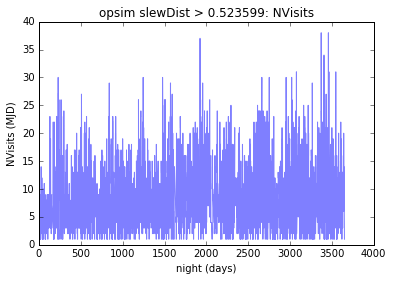

In [15]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [16]:
bundle.summaryValues

{'Mean': 8.7237587470843057, 'Median': 8.0}